In [23]:
"""
ETAPA 3: MODELO BASELINE - REGRESSÃO LINEAR
PARTE 1: IMPORTS + CARREGAR DADOS
=============================================
"""


# ============================================================================
# IMPORTS
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 70)
print("ETAPA 3: MODELO BASELINE - REGRESSÃO LINEAR")
print("=" * 70)
 
# ============================================================================
# PASSO 1: CARREGAR DADOS LIMPOS
# ============================================================================

# Caminho do arquivo
DATA_PATH = r'../data/processed/students_performance_clean.csv'

# Carregar dados
df = pd.read_csv(DATA_PATH)

print(f"\n✓ Dados carregados com sucesso!")
print(f"  Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")

print(f"\nPrimeiras linhas do dataset:")
print(df.head(3))

print(f"\nInformações do dataset:")
print(df.info())

print("\n✅ PARTE 1 CONCLUÍDA!")
print("=" * 70)

ETAPA 3: MODELO BASELINE - REGRESSÃO LINEAR

✓ Dados carregados com sucesso!
  Dimensões: 2510 linhas × 16 colunas

Primeiras linhas do dataset:
  student_id       age gender parental_education  study_hours_week  \
0   STD01416  0.135965      M           bachelor         -0.599812   
1   STD01345 -0.948589      M           bachelor          0.341469   
2   STD01705  1.220520      M             master         -0.012127   

   attendance_rate extracurricular  sleep_hours  previous_scores tutoring  \
0         0.976572             Yes    -0.401044        -0.850312       No   
1        -0.085069             Yes     0.889407        -0.755003       No   
2         0.003979             Yes    -0.313959         1.557327       No   

  internet_quality family_income  health_status  final_grade  \
0             Good        Medium            NaN    -0.899949   
1             Good        Medium            NaN     0.851574   
2             Good        Medium            NaN     1.062455   

   study

In [24]:
"""
ETAPA 3: MODELO BASELINE - REGRESSÃO LINEAR
PARTE 2: SEPARAR X (FEATURES) E Y (TARGET)
===========================================
"""

# ============================================================================
# PASSO 2: SEPARAR FEATURES (X) e TARGET (y)
# ============================================================================

print("\n" + "=" * 70)
print("PASSO 2: SEPARAÇÃO DE FEATURES E TARGET")
print("=" * 70)

TARGET_COLUMN = 'final_grade'
COLUNAS_REMOVER = []  # Nenhuma coluna será removida

# Separar X e y
X = df.drop(columns=[TARGET_COLUMN] + COLUNAS_REMOVER, errors='ignore')
y = df[TARGET_COLUMN]

print(f"\n✓ Features (X): {X.shape[1]} colunas")
print(f"✓ Target (y): {y.shape[0]} amostras")

print(f"\nFeatures utilizadas:")
for i, col in enumerate(X.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\nTarget (final_grade) - Estatísticas:")
print(f"  Média:    {y.mean():.2f}")
print(f"  Mediana:  {y.median():.2f}")
print(f"  Min:      {y.min():.2f}")
print(f"  Max:      {y.max():.2f}")
print(f"  Std Dev:  {y.std():.2f}")

print("\n✅ PARTE 2 CONCLUÍDA!")
print("=" * 70)


PASSO 2: SEPARAÇÃO DE FEATURES E TARGET

✓ Features (X): 15 colunas
✓ Target (y): 2510 amostras

Features utilizadas:
   1. student_id
   2. age
   3. gender
   4. parental_education
   5. study_hours_week
   6. attendance_rate
   7. extracurricular
   8. sleep_hours
   9. previous_scores
  10. tutoring
  11. internet_quality
  12. family_income
  13. health_status
  14. study_efficiency
  15. health_sleep_ratio

Target (final_grade) - Estatísticas:
  Média:    0.00
  Mediana:  0.16
  Min:      -3.88
  Max:      1.21
  Std Dev:  1.00

✅ PARTE 2 CONCLUÍDA!


In [25]:
#ETAPA 3: MODELO BASELINE - REGRESSÃO LINEAR
#PARTE 3: DIVIDIR DADOS (60/20/20)



# PASSO 3: DIVISÃO DOS DADOS (60% TREINO / 20% VALIDAÇÃO / 20% TESTE)


print("\n" + "=" * 70)
print("PASSO 3: DIVISÃO DOS DADOS")
print("=" * 70)

RANDOM_STATE = 42

# Primeiro split: 80% temp + 20% teste
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE
)

# Segundo split: 60% treino + 20% validação (do temp)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.25,  # 25% de 80% = 20% do total
    random_state=RANDOM_STATE
)

# Verificação da divisão
total_samples = len(X)

print(f"\nTotal de amostras: {total_samples}\n")
print(f"├─ Treino:     {len(X_train):4d} amostras ({len(X_train)/total_samples*100:.1f}%)")
print(f"├─ Validação:  {len(X_val):4d} amostras ({len(X_val)/total_samples*100:.1f}%)")
print(f"└─ Teste:      {len(X_test):4d} amostras ({len(X_test)/total_samples*100:.1f}%)")

# Verificar distribuição do target
print(f"\nDistribuição do target nos 3 conjuntos:")
print(f"├─ Treino:     média={y_train.mean():.3f}, std={y_train.std():.3f}")
print(f"├─ Validação:  média={y_val.mean():.3f}, std={y_val.std():.3f}")
print(f"└─ Teste:      média={y_test.mean():.3f}, std={y_test.std():.3f}")

print("\n✅ PARTE 3 CONCLUÍDA!")
print("=" * 70)


PASSO 3: DIVISÃO DOS DADOS

Total de amostras: 2510

├─ Treino:     1506 amostras (60.0%)
├─ Validação:   502 amostras (20.0%)
└─ Teste:       502 amostras (20.0%)

Distribuição do target nos 3 conjuntos:
├─ Treino:     média=-0.004, std=1.011
├─ Validação:  média=-0.044, std=1.011
└─ Teste:      média=0.057, std=0.954

✅ PARTE 3 CONCLUÍDA!


In [26]:
"""
ETAPA 3: MODELO BASELINE - REGRESSÃO LINEAR
PARTE 4: TREINAR MODELO
=======================
"""

# ============================================================================
# PASSO 4: CRIAR E TREINAR MODELO
# ============================================================================

print("\n" + "=" * 70)
print("PASSO 4: TREINAMENTO DO MODELO")
print("=" * 70)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import pandas as pd

# Identificar tipos de colunas
categoricas = X_train.select_dtypes(include=['object']).columns
numericas = X_train.select_dtypes(exclude=['object']).columns

print("\nColunas numéricas:", list(numericas))
print("Colunas categóricas:", list(categoricas))

# Criar pré-processador com Imputer + OneHotEncoder
preprocessador = ColumnTransformer(transformers=[
    ("num", Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median"))
    ]), numericas),

    ("cat", Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]), categoricas)
])

# Criar pipeline final
modelo = Pipeline(steps=[
    ("preprocessamento", preprocessador),
    ("regressor", LinearRegression())
])

print("\nTreinando Regressão Linear...")
modelo.fit(X_train, y_train)
print("✓ Modelo treinado com sucesso!\n")

# Como os nomes das features mudam após OneHotEncoder,
# vamos apenas mostrar o intercepto por enquanto
print(f"Intercepto (nota base): {modelo.named_steps['regressor'].intercept_:.4f}\n")

print("\n⚠ Coeficientes não exibidos pois OneHotEncoder expande as features.")

print("\n✅ PARTE 4 CONCLUÍDA!")
print("=" * 70)



PASSO 4: TREINAMENTO DO MODELO

Colunas numéricas: ['age', 'study_hours_week', 'attendance_rate', 'sleep_hours', 'previous_scores', 'health_status', 'study_efficiency', 'health_sleep_ratio']
Colunas categóricas: ['student_id', 'gender', 'parental_education', 'extracurricular', 'tutoring', 'internet_quality', 'family_income']

Treinando Regressão Linear...
✓ Modelo treinado com sucesso!

Intercepto (nota base): 0.2440


⚠ Coeficientes não exibidos pois OneHotEncoder expande as features.

✅ PARTE 4 CONCLUÍDA!


In [27]:
"""
ETAPA 3: MODELO BASELINE - REGRESSÃO LINEAR
PARTE 5: FAZER PREVISÕES
=======================

"""

# ============================================================================
# PASSO 5: FAZER PREVISÕES
# ============================================================================

print("\n" + "=" * 70)
print("PASSO 5: FAZENDO PREVISÕES")
print("=" * 70)

# Fazer previsões no treino
y_train_pred = modelo.predict(X_train)

# Fazer previsões na validação
y_val_pred = modelo.predict(X_val)

print("\n✓ Previsões realizadas com sucesso!")
print(f"  Previsões Treino: {len(y_train_pred)} valores")
print(f"  Previsões Validação: {len(y_val_pred)} valores")

print("\n✅ PARTE 5 CONCLUÍDA!")
print("=" * 70)


PASSO 5: FAZENDO PREVISÕES

✓ Previsões realizadas com sucesso!
  Previsões Treino: 1506 valores
  Previsões Validação: 502 valores

✅ PARTE 5 CONCLUÍDA!


In [28]:
"""
ETAPA 3: MODELO BASELINE - REGRESSÃO LINEAR
PARTE 6: CALCULAR MÉTRICAS
==========================
"""

# ============================================================================
# PASSO 6: CALCULAR MÉTRICAS
# ============================================================================

def calcular_metricas(y_true, y_pred, dataset_name=""):
    """Calcula e retorna métricas de regressão."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name}:")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}

print("\n" + "=" * 70)
print("PASSO 6: MÉTRICAS DE PERFORMANCE")
print("=" * 70)

metricas_treino = calcular_metricas(y_train, y_train_pred, "TREINO")
metricas_val = calcular_metricas(y_val, y_val_pred, "VALIDAÇÃO")
# Comparação
print(f"\n" + "-" * 70)
print("COMPARAÇÃO TREINO vs VALIDAÇÃO")
print("-" * 70)

comparacao = pd.DataFrame.from_dict(
    {
        "Treino": metricas_treino,
        "Validação": metricas_val
    }
)

# Calcula diferença como nova coluna
comparacao["Diferença"] = abs(comparacao["Treino"] - comparacao["Validação"])

print(comparacao)


# Análise de overfitting
diferenca_r2 = abs(metricas_treino['R²'] - metricas_val['R²'])
print(f"\n📊 ANÁLISE DE OVERFITTING:")

if diferenca_r2 < 0.05:
    status = "✅ Excelente! Modelo generaliza muito bem"
elif diferenca_r2 < 0.10:
    status = "✅ Bom! Modelo generaliza bem"
elif diferenca_r2 < 0.20:
    status = "⚠️  Atenção! Algum overfitting, mas aceitável"
else:
    status = "❌ Problema! Overfitting significativo"

print(f"Diferença R²: {diferenca_r2:.4f} → {status}")

print("\n✅ PARTE 6 CONCLUÍDA!")
print("=" * 70)


PASSO 6: MÉTRICAS DE PERFORMANCE

TREINO:
  MSE:  0.0000
  RMSE: 0.0001
  MAE:  0.0001
  R²:   1.0000

VALIDAÇÃO:
  MSE:  0.5901
  RMSE: 0.7682
  MAE:  0.6123
  R²:   0.4218

----------------------------------------------------------------------
COMPARAÇÃO TREINO vs VALIDAÇÃO
----------------------------------------------------------------------
            Treino  Validação  Diferença
MSE   1.555799e-08   0.590148   0.590148
RMSE  1.247317e-04   0.768211   0.768086
MAE   5.581532e-05   0.612269   0.612213
R²    1.000000e+00   0.421804   0.578196

📊 ANÁLISE DE OVERFITTING:
Diferença R²: 0.5782 → ❌ Problema! Overfitting significativo

✅ PARTE 6 CONCLUÍDA!



PASSO 7: CRIANDO GRÁFICOS

✓ Gráfico 1 salvo: 01_predicoes_vs_real.png

✅ PARTE 7 CONCLUÍDA!


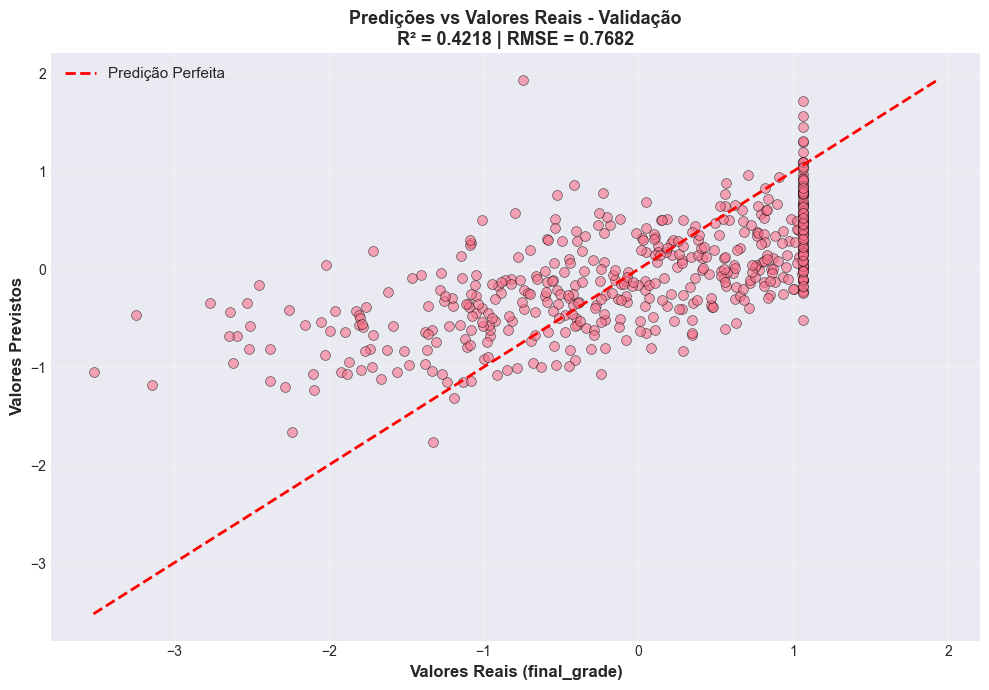

In [29]:
"""
ETAPA 3: MODELO BASELINE - REGRESSÃO LINEAR
PARTE 7: GRÁFICO 1 - PREDIÇÕES vs VALORES REAIS
================================================

"""

# ============================================================================
# PASSO 7: GRÁFICO 1 - PREDIÇÕES vs VALORES REAIS
# ============================================================================

print("\n" + "=" * 70)
print("PASSO 7: CRIANDO GRÁFICOS")
print("=" * 70)

# GRÁFICO 1: Predições vs Valores Reais
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(y_val, y_val_pred, alpha=0.6, edgecolors='k', linewidth=0.5, s=50)

min_val = min(y_val.min(), y_val_pred.min())
max_val = max(y_val.max(), y_val_pred.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Predição Perfeita')

ax.set_xlabel('Valores Reais (final_grade)', fontsize=12, fontweight='bold')
ax.set_ylabel('Valores Previstos', fontsize=12, fontweight='bold')
ax.set_title(f'Predições vs Valores Reais - Validação\nR² = {metricas_val["R²"]:.4f} | RMSE = {metricas_val["RMSE"]:.4f}', 
             fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('03_imagem/01_predicoes_vs_real.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfico 1 salvo: 01_predicoes_vs_real.png")


print("\n✅ PARTE 7 CONCLUÍDA!")
print("=" * 70)


✓ Gráfico 2 salvo: 02_distribuicao_residuos.png

✅ PARTE 8 CONCLUÍDA!


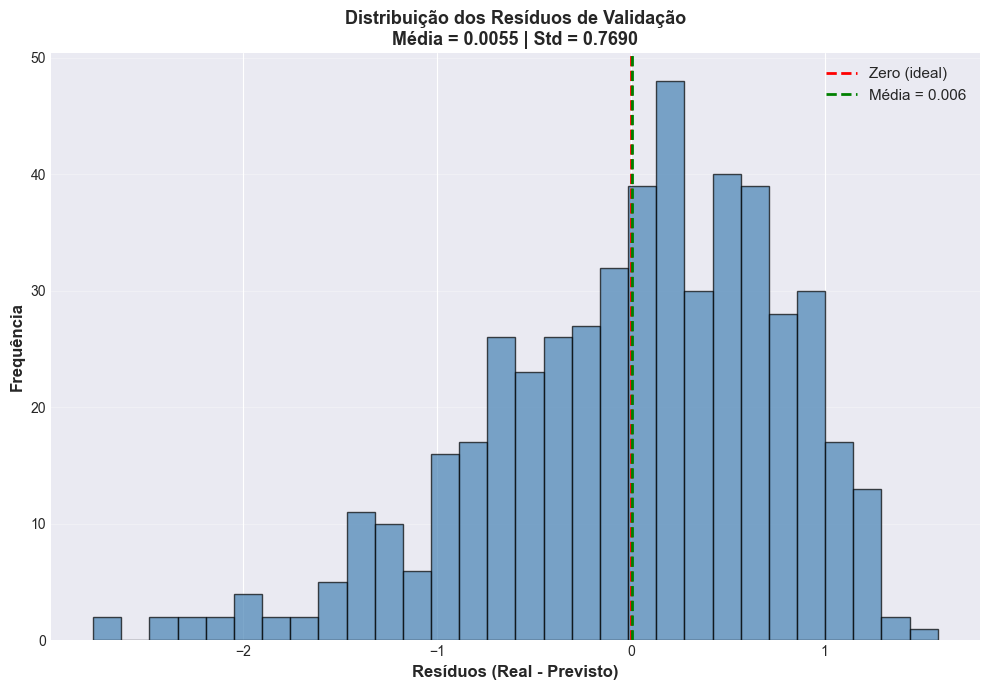

In [30]:
"""
ETAPA 3: MODELO BASELINE - REGRESSÃO LINEAR
PARTE 8: GRÁFICO 2 - DISTRIBUIÇÃO DE RESÍDUOS
==============================================

"""

# ============================================================================
# PASSO 8: GRÁFICO 2 - DISTRIBUIÇÃO DE RESÍDUOS
# ============================================================================

# Calcular resíduos
residuos = y_val - y_val_pred

fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(residuos, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
ax.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero (ideal)')
ax.axvline(residuos.mean(), color='green', linestyle='--', linewidth=2, 
           label=f'Média = {residuos.mean():.3f}')

ax.set_xlabel('Resíduos (Real - Previsto)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequência', fontsize=12, fontweight='bold')
ax.set_title(f'Distribuição dos Resíduos de Validação\nMédia = {residuos.mean():.4f} | Std = {residuos.std():.4f}', 
             fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('03_imagem/02_distribuicao_residuos.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfico 2 salvo: 02_distribuicao_residuos.png")


print("\n✅ PARTE 8 CONCLUÍDA!")
print("=" * 70)

In [31]:

# Obter nomes das features após o OneHotEncoder
nomes_features = modelo.named_steps["preprocessamento"].get_feature_names_out()

# Obter coeficientes do modelo treinado
coeficientes = modelo.named_steps["regressor"].coef_

# Criar DataFrame com as features e coeficientes
coeficientes_df = pd.DataFrame({
    "Feature": nomes_features,
    "Coeficiente": coeficientes
})

# Ordenar pela importância (valor absoluto)
coeficientes_df = coeficientes_df.reindex(
    coeficientes_df["Coeficiente"].abs().sort_values(ascending=False).index
)



✓ Gráfico 3 salvo: 03_importancia_features.png


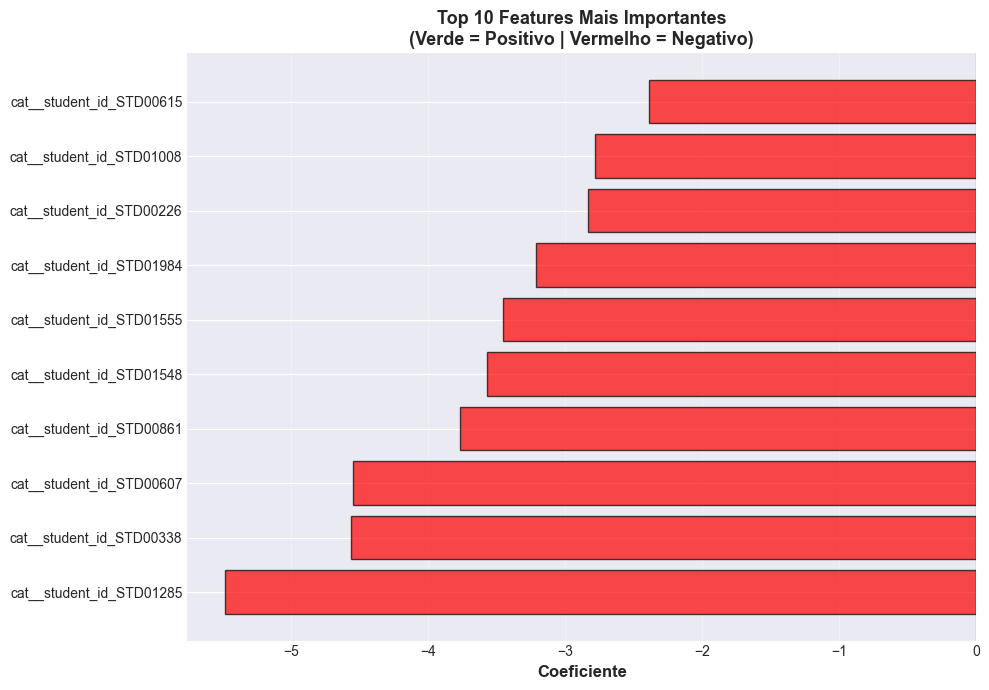


✅ PARTE 9 CONCLUÍDA!


In [32]:
""""
ETAPA 3: MODELO BASELINE - REGRESSÃO LINEAR
PARTE 9: GRÁFICO 3 - IMPORTÂNCIA DE FEATURES
============================================
"""
# ============================================================================
# PASSO 9: GRÁFICO 3 - IMPORTÂNCIA DAS FEATURES (TOP 10)
# ============================================================================

fig, ax = plt.subplots(figsize=(10, 7))
top_features = coeficientes_df.head(10)
cores = ['green' if x > 0 else 'red' for x in top_features['Coeficiente']]
ax.barh(range(len(top_features)), top_features['Coeficiente'], color=cores, alpha=0.7, edgecolor='black')
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['Feature'])
ax.set_xlabel('Coeficiente', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Features Mais Importantes\n(Verde = Positivo | Vermelho = Negativo)', 
             fontsize=13, fontweight='bold')
ax.axvline(0, color='black', linestyle='-', linewidth=0.8)
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('03_imagem/03_importancia_features.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfico 3 salvo: 03_importancia_features.png")
plt.tight_layout()
plt.savefig('03_importancia_features.png', dpi=300, bbox_inches='tight')
plt.show()  # ⬅️ Mostra o gráfico na tela


print("\n✅ PARTE 9 CONCLUÍDA!")
print("=" * 70)

In [33]:
"""
ETAPA 3: MODELO BASELINE - REGRESSÃO LINEAR
PARTE 10: RESUMO FINAL + ANÁLISE + SALVAR MODELO
===============================================
"""


# ============================================================================
# PASSO 10: ANÁLISE DETALHADA DOS RESÍDUOS
# ============================================================================

print("\n" + "=" * 70)
print("PASSO 10: ANÁLISE DETALHADA DOS RESÍDUOS")
print("=" * 70)

print(f"\nEstatísticas dos Resíduos (Validação):")
print(f"  Média:         {residuos.mean():+.4f}  (ideal: ~0)")
print(f"  Mediana:       {residuos.median():+.4f}")
print(f"  Desvio Padrão: {residuos.std():.4f}")
print(f"  Min:           {residuos.min():+.4f}")
print(f"  Max:           {residuos.max():+.4f}")
print(f"  Percentil 25:  {residuos.quantile(0.25):+.4f}")
print(f"  Percentil 75:  {residuos.quantile(0.75):+.4f}")

if abs(residuos.mean()) < 0.1:
    print(f"\n✅ Resíduos centrados em zero (média ≈ 0)")
else:
    print(f"\n⚠️  Resíduos NÃO centrados (média = {residuos.mean():.3f})")
    print("   Modelo pode ter viés sistemático")

# ============================================================================
# PASSO 11: SALVAR MODELO E COEFICIENTES
# ============================================================================

print("\n" + "=" * 70)
print("PASSO 11: SALVANDO MODELO")
print("=" * 70)

modelo_path = '../models/baseline_model.pkl'
joblib.dump(modelo, modelo_path)
print(f"\n✓ Modelo salvo: {modelo_path}")

# Salvar também os coeficientes em CSV
coeficientes_df.to_csv('../data/processed/coeficientes_modelo.csv', index=False)
print(f"✓ Coeficientes salvos: coeficientes_modelo.csv")

# ============================================================================
# PASSO 12: RESUMO FINAL
# ============================================================================

print("\n" + "=" * 70)
print("RESUMO FINAL - ETAPA 3 CONCLUÍDA")
print("=" * 70)

print(f"""

    RESULTADOS DO BASELINE                          

                                                                       
 📊 MÉTRICAS DE VALIDAÇÃO:                                           
      ├─ RMSE: {metricas_val['RMSE']:.4f} (escala: < 0.8 excelente)       
     └─ MAE:  {metricas_val['MAE']:.4f}                                    
                                                                       
  🎯 ANÁLISE:                                                          
     └─ Diferença R² (Treino-Val): {diferenca_r2:.4f} ({status})    
                                                                       
  📈 TOP 3 FEATURES IMPORTANTES:                                       
     1. {coeficientes_df.iloc[0]['Feature']:25s} → {coeficientes_df.iloc[0]['Coeficiente']:+.4f}
     2. {coeficientes_df.iloc[1]['Feature']:25s} → {coeficientes_df.iloc[1]['Coeficiente']:+.4f}
     3. {coeficientes_df.iloc[2]['Feature']:25s} → {coeficientes_df.iloc[2]['Coeficiente']:+.4f}
                                                                       
  💾 ARQUIVOS GERADOS:                                                 
     ├─ 01_predicoes_vs_real.png                                     
     ├─ 02_distribuicao_residuos.png                                 
    ├─ 03_importancia_features.png                                  
    ├─ baseline_model.pkl                                            
    └─ coeficientes_modelo.csv                                       

""")

print("\n" + "=" * 70)
print("INTERPRETAÇÕES E INSIGHTS")
print("=" * 70)

print(f"""
1️⃣  R² = {metricas_val['R²']:.4f}
    O modelo explica {metricas_val['R²']*100:.1f}% da variação nas notas finais.
    De cada 100 pontos de diferença entre alunos, conseguimos explicar {metricas_val['R²']*100:.0f}.

2️⃣  RMSE = {metricas_val['RMSE']:.4f}
    Erro médio de {metricas_val['RMSE']:.2f} pontos numa escala de 0-10.
    Representa {metricas_val['RMSE']/10*100:.1f}% de erro relativo.

3️⃣  OVERFITTING
    Diferença R²: {diferenca_r2:.4f}
    {status}

4️⃣  FEATURES MAIS IMPORTANTES
    As variáveis que mais influenciam a nota final são:
    - {coeficientes_df.iloc[0]['Feature']}: {coeficientes_df.iloc[0]['Coeficiente']:+.4f}
    - {coeficientes_df.iloc[1]['Feature']}: {coeficientes_df.iloc[1]['Coeficiente']:+.4f}
    - {coeficientes_df.iloc[2]['Feature']}: {coeficientes_df.iloc[2]['Coeficiente']:+.4f}
""")

print("\n🚀 PRÓXIMOS PASSOS (ETAPA 4):")
print("   1. Testar modelos mais complexos (Random Forest, XGBoost)")
print("   2. Criar features de interação")
print("   3. Otimizar hiperparâmetros")
print(f"   4. Meta: R² > {metricas_val['R²']:.3f} e RMSE < {metricas_val['RMSE']:.3f}")

print("\n" + "=" * 70)
print("✅ ETAPA 3 FINALIZADA COM SUCESSO!")
print("=" * 70)


PASSO 10: ANÁLISE DETALHADA DOS RESÍDUOS

Estatísticas dos Resíduos (Validação):
  Média:         +0.0055  (ideal: ~0)
  Mediana:       +0.1195
  Desvio Padrão: 0.7690
  Min:           -2.7754
  Max:           +1.5835
  Percentil 25:  -0.4633
  Percentil 75:  +0.5847

✅ Resíduos centrados em zero (média ≈ 0)

PASSO 11: SALVANDO MODELO

✓ Modelo salvo: ../models/baseline_model.pkl
✓ Coeficientes salvos: coeficientes_modelo.csv

RESUMO FINAL - ETAPA 3 CONCLUÍDA


    RESULTADOS DO BASELINE                          


 📊 MÉTRICAS DE VALIDAÇÃO:                                           
      ├─ RMSE: 0.7682 (escala: < 0.8 excelente)       
     └─ MAE:  0.6123                                    

  🎯 ANÁLISE:                                                          
     └─ Diferença R² (Treino-Val): 0.5782 (❌ Problema! Overfitting significativo)    

  📈 TOP 3 FEATURES IMPORTANTES:                                       
     1. cat__student_id_STD01285  → -5.4816
     2. cat__student_id